<a href="https://colab.research.google.com/github/esraa-abdelmaksoud/Shai-Training-Notebooks/blob/main/task_8_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# shAI Training 2022 | Level 1


## Task#8 (MNIST Project)

### Classification

- Before you start make sure you have latest Jupyter notebook version 
- <font color= red> If you have older version fetching the data might be different  </font>  


## Get tha dataset

In [86]:
# import sklearn.datasets

In [87]:
# CODE HERE 
# IF you got stuck use GOOGLE 
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [88]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

### exploring and preparing the dataset

#### print your dataset to get insight

In [89]:
# CODE HERE
for k,v in mnist.items():
  print(k,v)

data        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  p

#### Split you data into data and labels (target)

In [90]:
# CODE HERE
X, y = mnist['data'], mnist['target']

#### find the data shape using .shape function

In [91]:
# CODE HERE
X.shape

(70000, 784)

### Peek at one digit from the dataset

In [92]:
import matplotlib
import matplotlib.pyplot as plt

***NOTE: ALL THE COMMANDS FOR PLOTTING A FIGURE SHOULD ALL GO IN THE SAME CELL. SEPARATING THEM OUT INTO MULTIPLE CELLS MAY CAUSE NOTHING TO SHOW UP.***

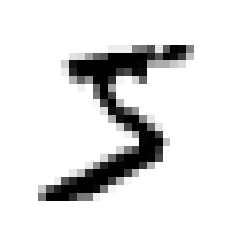

In [93]:
# CODE HERE 
some_digit = X.loc[0,:].values
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap='binary')
plt.axis("off")
plt.show()

#### Split the data into train and test set

In [94]:
import numpy as np 

In [95]:
# CODE HERE 
# Casting y to int because it is currently a string
y = y.astype(np.int8)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Shuffling the training set

In [96]:
#hint shuffle-vs-permutation-numpy
# CODE HERE

# Prefer sklearn to shuffle the training and test set together without setting a seed

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0)

#### access the label of the above digit image 

In [97]:
# CODE HERE
y_train[0]

5

### Training a <font color= red>Binary</font> classifier 


#### Create the target vectors for this classification task
***NOTE : you can try different number.***

In [98]:
# CODE HERE
# If you got stuck use GOOGLE
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

### SGD classifier

#### Create a SGD classifier 

In [99]:
from sklearn.linear_model import SGDClassifier

In [100]:
# CODE HERE
sgd_clf = SGDClassifier(random_state=42, max_iter=1000)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

#### use SGD classifier  to detect images of the number 5 

In [115]:
# CODE HERE
sgd_clf.predict([some_digit])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([False])

## Performance measure 

####  Measuring Accuracy Using <font color= blue>Cross-validation</font>

In [102]:
from sklearn.model_selection import cross_val_score

In [103]:
# CODE HERE
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.95815, 0.96365, 0.95895])

#### Try a dumb classifier

In [104]:
# CODE HERE
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    return self
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

#### find cross_val_score for the dumb classifier

In [105]:
#CODE HERE
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91115, 0.90825, 0.90955])

## Confusion matrix

In [106]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

#### try to find confusion matrix 

In [107]:
# CODE HERE
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5)
confusion_matrix(y_train_5, y_train_pred)

array([[53569,  1010],
       [ 1264,  4157]])

####  try perfect classifier which will have only true positives and true negative


In [108]:
# CODE HERE
y_train_predictions = y_train_5
confusion_matrix(y_train_5, y_train_predictions)

array([[54579,     0],
       [    0,  5421]])

## Precision and Recall

In [109]:
from sklearn.metrics import precision_score, recall_score,f1_score

***Note that precision and recall score might be different from one to anothor***

#### find precision score

In [113]:
# CODE HERE
precision_score(y_train_5, y_train_pred)

0.804528740081285

#### find recall score

In [111]:
# CODE HERE
recall_score(y_train_5, y_train_pred)

0.766832687695997

#### find f1 score 
***Notice that f1 score is harmonic mean between recall and precision***

In [112]:
# CODE HERE
f1_score(y_train_5, y_train_pred)

0.7852285606346807

# Precision/Recall Tradeof

#### try to use decision_function() and make prediction

In [114]:
# CODE HERE
y_scores = sgd_clf.decision_function([some_digit])
y_scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([-4394.66801246])

#### Set the threshold to zero

In [116]:
# CODE HERE
threshold = 0
y_some_digit_pred = (y_scores > threshold)

#### Set the threshold to 200000

In [117]:
# CODE HERE
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

#### To decide which threshold you want to use find decision scores for all instances

In [119]:
# CODE HERE
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")
y_scores

array([ -7396.13653056, -25271.09022853, -12289.4320797 , ...,
       -15488.4616471 , -13162.37882698, -22111.21217609])

#### computing precision and recall for all possible thresholds using the precision_recall_curve() 

In [120]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

#### plot precision and recall as functions of the threshold value using Matplotlib

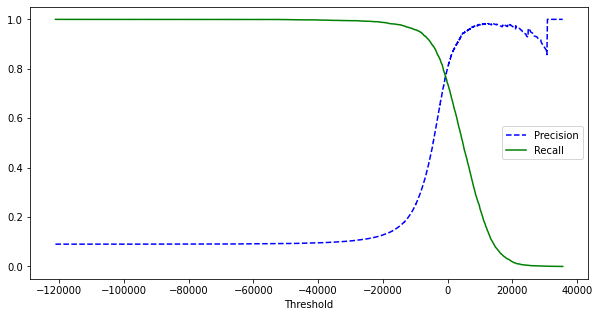

In [125]:
# CODE HERE
plt.figure(figsize=(10,5)) 
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.legend()
plt.xlabel('Threshold')
plt.show()

#### lets aim for 90%recall 
#### try different threshold and see what will happen

#### precision score

In [128]:
# CODE HERE
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
y_train_pred_90 = (y_scores >= threshold_90_precision)
precision_score(y_train_5, y_train_pred_90)

0.9001100715465052

#### recall score

In [129]:
#CODE HERE
recall_score(y_train_5, y_train_pred_90)

0.6033942077107545

# The ROC Curve

In [130]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

#### plot the FPR against the TPR using Matplotlib

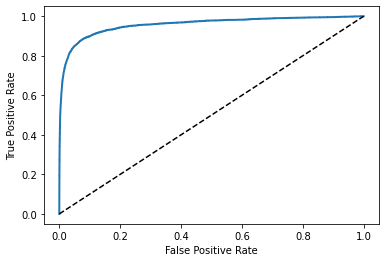

In [131]:
# CODE HERE
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### computing the ROC AUC score

In [132]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9572082943938749

# RandomForest Classifier
#### train a RandomForestClassifier and compare its ROC curve and ROC AUC score to the SGDClassifier

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# CODE HERE


#### try to plot ROC 
***Notice that you will need scores not probabilities***

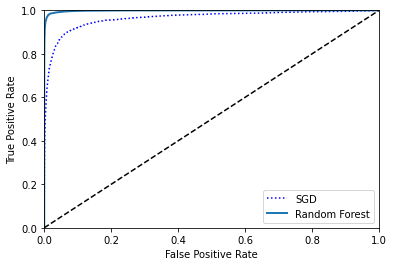

In [ ]:
# CODE HERE
# if you got suck use GOOGLE


#### find ROC AUC score for randomforestclassifier

In [ ]:
# CODE HERE 


0.9984712735923079


# Congrats you did it 🥳 !
# #shAI_Club